# Inferência com Regressão Linear

- A reta escolhida será a que mais se aproximar dos pontos, a que "erra" menos - conforme falado em materiais passados

## Equação de uma reta

$y_{i} = bx + a$
b = coeficinete angular (`coef_`) e a = coeficiente linear (`intercept_`)

> Porém, para que os coeficientes façam sentido, precisamos que a regressão linear cumpra uma série de premissas. O cumprimento delas garante que a gente tenha estimadores chamados de BLUE, best linear unbiased estimators (melhores estimadores lineares não-viesados).


# EQUAÇÃO E INTRODUÇÃO FORMAL DOS CONCEITOS

- Quando procuramos entender a influência de mais de uma variável, assim como estarmos cientes de que nenhum modelo irá conseguir passar por todos os pontos, temos aqui o termo de erro `e`, que ditará a distância entre cada um dos pontos com o modelo linear que melhor se ajusta aos dados apresentados. Nesse exemplo apresentado, podemos obter um modelo teórico que se assemelha a:

$y_{i} = a + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} + e$

> onde cada **b** representa cada uma das variáveis independentes


## Modelo tradicional

$y_{i} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + e$

> 1. y é a variável dependente (~target)
> 2. β0 é o intercepto, ou seja, o valor de y quando as variáveis independentes são zero
> 3. βn é a n-ésima variável independente (~feature) e é o resíduo, a diferença entre o valor previsto pelo modelo e o valor observado

# Premissas de uma Regressão Linear

Para o modelo ser entendido como um modelo de regressão linear e sem viés, precisamos garantir essas 5 premissas:

1. linearidade nos parâmetros, 
2. amostragem aleatória, 
3. média condicional do termo de erro igual a zero, 
4. ausência de multicolinearidade perfeita
5. homocedasticidade
> Para saber mais sobre: https://www.youtube.com/watch?v=5W8xhnL39dw


# Exemplo Prático

In [4]:
! pip install wooldridge

import pandas as pd
from wooldridge import *
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings('ignore')


In [5]:
gpa = dataWoo('GPA2') # type: ignore
gpa.head()

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0,0.010000
1,1170,18,4.00,0,0.82813,9.40,191,20.319149,0,1,0,88.360001
2,810,14,1.78,1,0.88372,1.19,42,35.294117,0,1,0,1.416100
3,940,40,2.42,0,0.80769,5.71,252,44.133099,0,1,0,32.604099
4,1180,18,2.61,0,0.73529,2.14,86,40.186916,0,1,0,4.579600


In [7]:
results = smf.ols('colgpa ~ hsperc + sat', data=gpa).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     777.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.77e-287
Time:                        17:08:25   Log-Likelihood:                -3481.3
No. Observations:                4137   AIC:                             6969.
Df Residuals:                    4134   BIC:                             6988.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3918      0.072     19.454      0.0

## Métricas 

1. p-valor: p-valor indica a probabilidade de obter um resultado igual ou mais extremo do que o observado, assumindo que a hipótese nula seja verdadeira

2. $R² = 1 - \frac{SS_{res}}{SS_{tot}}$

- SSRes (Soma dos Quadrados dos Resíduos): representa a soma dos quadrados das diferenças entre os valores observados e os valores previstos pelo modelo de regressão. Essa métrica mensura a variabilidade não explicada pelo modelo, ou seja, a parcela de variabilidade que não pode ser explicada pelas variáveis independentes incluídas no modelo. Quanto menor for o valor de SSR, maior será a capacidade do modelo em explicar a variabilidade nos dados.

- SSTot (Soma Total dos Quadrados): representa a soma dos quadrados das diferenças entre os valores observados da variável dependente e a média dos valores observados. Essa métrica mensura a variabilidade total da variável dependente, independente do modelo. Em outras palavras, ela representa a variabilidade que existe nos dados antes de aplicar qualquer modelo de regressão.


- Obs: Adj. R-Squared: O r-quadrado tem uma "falha" que é a de que ele aumenta (ou mantém) seu valor na medida que aumentamos o número de coeficientes. O R-quadrado ajustado, por outro lado, leva em conta o número de preditores no modelo. Aumentará apenas se a nova variável melhorar o modelo mais do que seria esperado por acaso. Ele diminuirá quando uma variável não útil for adicionada.

3. $R²_{adj} = 1 - \frac{(1 - R²)(n - 1)}{n - k - 1}$

4. F-Statistic: Significância do modelo. A estatística F é uma medida estatística utilizada na análise de regressão linear para avaliar a significância global do modelo. Ela é calculada a partir da comparação entre a variabilidade explicada pelo modelo e a variabilidade não explicada. A F-statistic representa o valor calculado da estatística F, enquanto a Prob (F-statistic) é o p-valor associado a essa estatística. O p-valor é usado para testar a hipótese nula de que não há relação entre as variáveis independentes e a variável dependente. Se o valor p for menor que um determinado nível de significância (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que o modelo é estatisticamente significativo.

# Avaliando o Modelo (foco Preditivo)

### Métricas de validação de modelo

1. **Mean Absolute Error (MAE)**: Ele mede o erro absoluto, ou seja, desconsiderando os sinais dos erros (as direções). Alguns podem dizer que é o erro médio "para cima, ou para baixo".

$\begin{equation}MAE = \frac{\sum_{i=1}^{n}{(|y_{i} - x_{i}|})}{n}\end{equation}$

2. **Mean Squared Error (MSE)**: ele penaliza erros maiores de forma mais severa do que erros menores.

$\begin{equation}MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_{i} - \hat{Y}_{i})^2\end{equation}$

3. **Root Mean Squared Error (RMSE)**: É uma forma mais interpretável para entendermos o que o MSE representa. Ou em outras palavras, quão longe estamos em média

$\begin{equation}RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_{i} - \hat{Y}_{i})^2}\end{equation}$

4. **Mean Abslute Percentage Error (MAPE)**: expressa o erro como uma porcentagem. É especialmente útil quando queremos entender o erro em relação ao valor real, dando-nos uma perspectiva percentual do quão longe estamos.

$\begin{equation}MAPE = \frac{1}{n}\sum_{t=1}^{n}\frac{|A_{t} - F_{t}|}{|A_{t}|}\end{equation}$

- A = Valor atual
- F = Valor previsto

5. $R^2$: representa a proporção da variância de uma variável dependente que é explicada por uma ou mais variáveis independentes em um modelo de regressão. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings('ignore')


## Variáveis 

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from sklearn.model_selection import train_test_split

X = insurance.drop('charges', axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [4]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numerical_features

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children'])

## Pipeline

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

In [16]:
!pip install xgboost

In [17]:
from sklearn.pipeline import Pipeline
import xgboost as xgb

pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('regressor', xgb.XGBRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_round...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_pred = pipeline.predict(X_test)

mea = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f""" Métricas: \n 
      MAE: {mea:.2f},
      MSE: {mse:.2f},
      RMSE: {rmse:.2f},
      MAPE: {mape:.2f}
      """)

 Métricas: 
 
      MAE: 2851.49,
      MSE: 23992386.81,
      RMSE: 4898.20,
      MAPE: 0.36
      


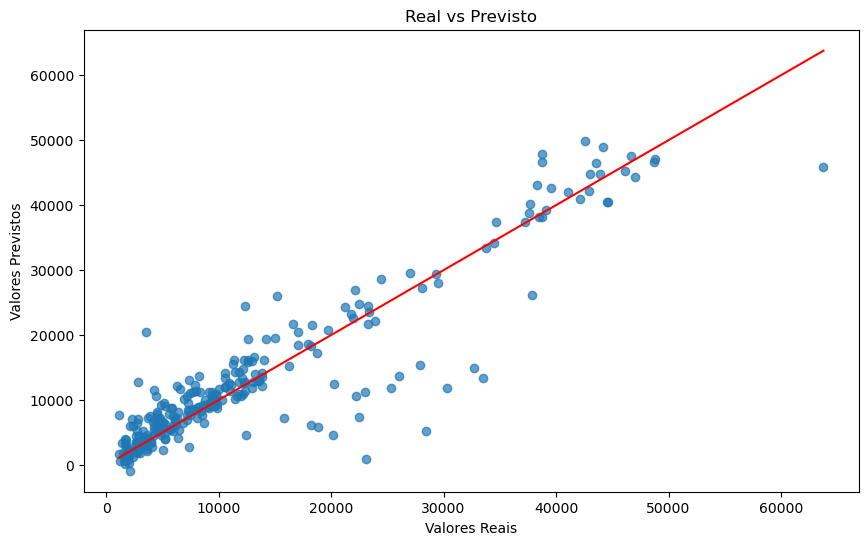

In [20]:
_ = plt.figure(figsize=(10, 6))

_ = plt.scatter(y_test, y_pred, alpha=.7)
_ = plt.plot([min(y_test), max(y_test)] , [min(y_test), max(y_test)], color = 'red')
_ = plt.xlabel("Valores Reais")
_ = plt.ylabel("Valores Previstos")
_ = plt.title("Real vs Previsto")
_ = plt.show()
